<a href="https://colab.research.google.com/github/ParkJeongUng/Ung.github.io/blob/master/_notebooks/%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%ED%9B%88%EB%A0%A8%EC%84%B8%ED%8A%B8_%ED%85%8C%EC%8A%A4%ED%8A%B8%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지도학습 비지도학습 // 훈련세트 테스트세트
1. 지도 학습과 비지도 학습
*   지도학습 --> 입력(input)데이터와 타깃(target)데이터 2가지를 합친 훈련 데이터를 가지고있다.
*   비지도학습 --> 타깃데이터 없이 입력데이터만 사용한다.

2. 훈련 세트와 테스트 세트
* 훈련 세트 --> 모델의 훈련을 위해 사용되는 데이터
* 테스트 세트 --> 훈련된 모델의 평가에 사용되는 데이터 --> 일반적으로 이미 준비된 데이터의 일부를 떼어서 사용



## 훈련세트와 테스트세트
 샘플링편향 발생

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# zip() 함수 이용해서 각 생선의 길이와 무게를 담은 2차원 list 생성
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [ ]:
#사이킷런 kneighbor 임포트
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
# 훈련세트(35개) 와 테스트세트(14개) 구분하기 --> 슬라이싱
train_input = fish_data[: 35]
train_target = fish_target[: 35]
test_input = fish_data[35: ]
test_target = fish_target[35: ]

In [ ]:
# 훈련세트 --> fit()함수로 모델 훈련
# 테스트세트 --> score()함수로 모델 평가
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

#샘플링 편향 발생 --> 마지막 14개(빙어 특성 14개)를 test_input 으로 넣어놔서 훈련에 사용된 train_input 에는 빙어가 하나도 없음 --> 데이터를 섞든지 골고루 샘플을 뽑아야 함 --> numpy 사용

0.0

## NUMPY를 이용한 샘플링 편향 해결
* 파이썬의 대표적인 배열 라이브러리
* 고차원의 배열을 쉽게 만들고 조작가능

In [ ]:
# numpy 라이브러리 임포트
import numpy as np

In [ ]:
# 파이썬 리스트를 넘파이 배열로 바꾸기 --> array()
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
# 배열의 크기를 알려주는 --> .shpae --> (샘플 수, 특성 수)를 출력한다.
print(input_arr.shape)

(49, 2)


In [ ]:
# 무작위로 샘플링 하기
# input 과 target 에서 같은 인덱스는 함께 선택되어야 한다. input의 2번은 train으로 target의 2번은 test로 가면 안된다.
# 넘파이의 random 함수들은 실행할 때마다 다른 결과를 만든다. --> random.seed()를 지정하면 항상 일정한 결과를 얻을 수 있다.
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)
index

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [ ]:
# numpy는 배열 인덱싱이 가능하다. --> 1개의 배열안에서 여러개의 원소를 선택해서 출력이 가능하다
print(input_arr[[1,3]]) # input_arr의 2번째와 4번째 원소 출력

# numpy 배열을 인덱스로 전하기 --> 훈련세트 생성
train_input = input_arr[index [ : 35]]
train_target = input_arr[index [ : 35]]

#랜덤으로 만들어진 index의 첫번째 원소는 13 --> input_arr의 14번째 원소(index = 13)가 train_input의 1번째 원소(index = 0)에 들어감
print(input_arr[13], train_input[0])

# numpy 배열을 인덱스로 전하기 --> 테스트세트 생성
test_input = input_arr[index [35 : ]]
test_target = input_arr[index [35 : ]]

#랜덤으로 만들어진 index의 35번째 원소는 37 --> input_arr의 38번째 원소(indexe = 37)가 test_input의 1번째 원소(index = 0)에 들어감 
print(input_arr[37], test_input[0])

[[ 26.3 290. ]
 [ 29.  363. ]]
[ 32. 340.] [ 32. 340.]
[10.6  7. ] [10.6  7. ]


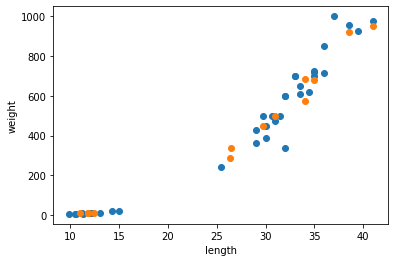

In [ ]:
# 훈련세트와 테스트세트가 잘 섞여서 생성되었는지 산점도로 확인
import matplotlib.pyplot as plt
plt.scatter(train_input[ :, 0], train_input[ :, 1])
plt.scatter(test_input[ :, 0], test_input[ :, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 연습

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[ : 35]]
train_target = target_arr[index [ : 35]]

test_input = input_arr[index[35 :]]
test_target = target_arr[index[35 :]]

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0